# Deep Learning for Credit Score Classificatino

## 1. Environment

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
DATA_DIR = './'
DATA = 'cleaned_train.csv'

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA))
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


## 2. Preprocessing

### Dropping Columns

In [4]:
cleaned_df = df.copy()

In [5]:
raw_cols = cleaned_df.columns.tolist()
raw_cols[:3]

['ID', 'Customer_ID', 'Month']

In [6]:
# 라벨 인코딩 대상 Feature
label_cols = [
    # 'Customer_ID',
    'Payment_of_Min_Amount',
    # 'Payment_Behaviour', # 라벨인코딩 또는 순서대로 대치
]

# 삭제 대상 Feature
drop_cols =[
    'ID',
    'Name',
    'SSN',
    'Occupation',
    'Annual_Income',
    'Type_of_Loan']

# 더미생성을 위한 Featue
dummy_cols = [
    'Num_of_Loan',             # 5 기준
    'Changed_Credit_Limit',    # 12기준
    'Credit_History_Age',      # 180 기준
]

# 로그변환 대상 Feature
log_scale_cols = [
    'Monthly_Inhand_Salary'
]

# sqrt 변환을 위한 Feature
sqrt_scale_cols = [
    'Outstanding_Debt',
    'Amount_invested_monthly', # 새롭게 추가
    'Total_EMI_per_month' # 새롭게 추가
]

#정규화를 위한 feature
standard_cols =[

]

# 원핫인코딩 대상 feature
onehot_cols =[
    # 'Type_of_Loan' # 분리한 이후에 진행해야함 나중에 추가 반영.
]

#PCA 대상 Feature
pca_cols = [

]

# Feature 특징을 고려한 개별 전처리
others_cols =[
    'Age', # 특정 숫자 기준으로 구간화
    'Credit_Mix', # Bad 0, Standard 1 , Good 2
    'Credit_Score', # Poor 0 , Standard 1, Good 2로 대치
]



#전처리 없는 Feature
processless_cols = (set(raw_cols) - set(label_cols) - set(dummy_cols) - set(drop_cols)
                    - set(log_scale_cols) - set(sqrt_scale_cols) - set(others_cols)
                    -set(pca_cols) - set(standard_cols) - set(onehot_cols))
processless_cols = list(processless_cols)

In [7]:
processless_cols

['Payment_Behaviour',
 'Interest_Rate',
 'Num_Credit_Card',
 'Monthly_Balance',
 'Month',
 'Credit_Utilization_Ratio',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Delay_from_due_date',
 'Customer_ID',
 'Num_Bank_Accounts']

In [8]:
cleaned_df = cleaned_df.drop(drop_cols, axis=1)

In [9]:
cleaned_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5,25.0,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6,25.0,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7,25.0,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


### Encoding Columns

#### Target Encoding

In [10]:
# label2idx 딕셔너리 생성
label2idx = {'Poor': 0, 'Standard': 1, 'Good': 2}

# cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score'] = cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score']

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [11]:
# idx to label dictionary
idx2label = {}
for idx, value in label2idx.items():
    idx2label[value] = idx

idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

#### Payment Behaviour Encoding

In [12]:
# payment behaviour 변화가 있었는 지 확인 필요
# dictionary 정의

pb2idx = {
    'Low_spent_Small_value_payments':0,
    'Low_spent_Medium_value_payments'  :1,
    'Low_spent_Large_value_payments' :2,
    'High_spent_Small_value_payments' :3,
    'High_spent_Medium_value_payments' :4,
    'High_spent_Large_value_payments'  :5
}

idx2pb = {
    number: string for string, number in pb2idx.items()
}

print(pb2idx)
print(idx2pb)

{'Low_spent_Small_value_payments': 0, 'Low_spent_Medium_value_payments': 1, 'Low_spent_Large_value_payments': 2, 'High_spent_Small_value_payments': 3, 'High_spent_Medium_value_payments': 4, 'High_spent_Large_value_payments': 5}
{0: 'Low_spent_Small_value_payments', 1: 'Low_spent_Medium_value_payments', 2: 'Low_spent_Large_value_payments', 3: 'High_spent_Small_value_payments', 4: 'High_spent_Medium_value_payments', 5: 'High_spent_Large_value_payments'}


In [13]:
cleaned_df['Payment_Behaviour'] = cleaned_df['Payment_Behaviour'].map(pb2idx)

In [14]:
cleaned_df['Payment_Behaviour']

0        3
1        2
2        1
3        0
4        4
        ..
99995    5
99996    4
99997    5
99998    2
99999    4
Name: Payment_Behaviour, Length: 100000, dtype: int64

#### Credit Mix Encoding

In [15]:
credit_mix_dict = {'Good': 2, 'Standard': 1, 'Bad': 0}

mix2label = {number:string for string, number in credit_mix_dict.items()}

In [16]:
cleaned_df['Credit_Mix'] = cleaned_df['Credit_Mix'].map(credit_mix_dict)
cleaned_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,26.822620,265.0,No,49.574949,21.465380,3,312.494089,2
1,3392,2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,2,809.98,31.944960,266.0,No,49.574949,21.465380,2,284.629162,2
2,3392,3,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,28.609352,267.0,No,49.574949,21.465380,1,331.209863,2
3,3392,4,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,2,809.98,31.377862,268.0,No,49.574949,21.465380,0,223.451310,2
4,3392,5,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,2,809.98,24.797347,269.0,No,49.574949,21.465380,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,2,502.38,34.663572,378.0,No,35.104023,24.028477,5,479.866228,0
99996,37932,5,25.0,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,2,502.38,40.565631,379.0,No,35.104023,24.028477,4,496.651610,0
99997,37932,6,25.0,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,2,502.38,41.255522,380.0,No,35.104023,24.028477,5,516.809083,0
99998,37932,7,25.0,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,2,502.38,33.638208,381.0,No,35.104023,24.028477,2,319.164979,1


#### Payment Min Encoding

In [17]:
cleaned_df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

cleaned_df['Payment_of_Min_Amount'] = le.fit_transform(cleaned_df['Payment_of_Min_Amount'])

pma_classes = le.classes_

In [20]:
print(pma_classes)
print(cleaned_df['Payment_of_Min_Amount'])


['NM' 'No' 'Yes']
0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Payment_of_Min_Amount, Length: 100000, dtype: int64


#### Age Binning

In [21]:
age_range = [10, 20, 30, 40, 50, 60]
age_labels = [10, 20, 30, 40, 50]
age_bins = pd.cut(cleaned_df['Age'], bins=age_range, labels=age_labels)
age_bins.describe()

count     100000
unique         5
top           30
freq       28968
Name: Age, dtype: int64

In [22]:
age_bins

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

In [23]:
cleaned_df['Age'] = age_bins
cleaned_df['Age']

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

In [24]:
cleaned_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,20,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,26.822620,265.0,1,49.574949,21.465380,3,312.494089,2
1,3392,2,20,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,2,809.98,31.944960,266.0,1,49.574949,21.465380,2,284.629162,2
2,3392,3,20,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,28.609352,267.0,1,49.574949,21.465380,1,331.209863,2
3,3392,4,20,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,2,809.98,31.377862,268.0,1,49.574949,21.465380,0,223.451310,2
4,3392,5,20,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,2,809.98,24.797347,269.0,1,49.574949,21.465380,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,20,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,2,502.38,34.663572,378.0,1,35.104023,24.028477,5,479.866228,0
99996,37932,5,20,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,2,502.38,40.565631,379.0,1,35.104023,24.028477,4,496.651610,0
99997,37932,6,20,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,2,502.38,41.255522,380.0,1,35.104023,24.028477,5,516.809083,0
99998,37932,7,20,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,2,502.38,33.638208,381.0,1,35.104023,24.028477,2,319.164979,1


### Dummy 만들기

In [25]:
def dummy_make_do (cols, input_data, thresh=5):
    """
    특정값을 기준으로 Y/N 더미변수로 만들기 위한 함수
    params:
      cols : 전처리 대상 features
      data : 원본 데이터
      thresh : 0/1 으로 만들기 위한 기준
    """

    data = input_data.copy()

    for col in cols:
        data[col] = data.apply(get_dummy,axis=1,args=[col,thresh])

    return data

def get_dummy(data, col ,thresh=5):

    if data[col] >= thresh :
        return 1
    elif data[col] < thresh:
        return 0
    else:
        return 2

In [26]:
# 더미 생성

print('전')
print(cleaned_df[dummy_cols].head())

cleaned_df = dummy_make_do(['Num_of_Loan'], cleaned_df, 5)
cleaned_df = dummy_make_do(['Changed_Credit_Limit'], cleaned_df, 12)
cleaned_df = dummy_make_do(['Credit_History_Age'], cleaned_df, 180)

print('\n후')
print(cleaned_df[dummy_cols].head())

전
   Num_of_Loan  Changed_Credit_Limit  Credit_History_Age
0          4.0                 11.27               265.0
1          4.0                 11.27               266.0
2          4.0                 11.27               267.0
3          4.0                  6.27               268.0
4          4.0                 11.27               269.0

후
   Num_of_Loan  Changed_Credit_Limit  Credit_History_Age
0            0                     0                   1
1            0                     0                   1
2            0                     0                   1
3            0                     0                   1
4            0                     0                   1


### Transformation

In [27]:
cleaned_df['Monthly_Inhand_Salary'] = np.log(cleaned_df['Monthly_Inhand_Salary'])
cleaned_df['Amount_invested_monthly'] = np.sqrt(cleaned_df['Amount_invested_monthly'])
cleaned_df['Outstanding_Debt'] = np.sqrt(cleaned_df['Outstanding_Debt'])
cleaned_df['Delay_from_due_date'] = np.sqrt(cleaned_df['Delay_from_due_date'])

In [28]:
cleaned_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,26.822620,1,1,49.574949,4.633075,3,312.494089,2
1,3392,2,20,7.509249,3.0,4.0,3.0,0,1.732051,4.0,...,2,28.460148,31.944960,1,1,49.574949,4.633075,2,284.629162,2
2,3392,3,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,28.609352,1,1,49.574949,4.633075,1,331.209863,2
3,3392,4,20,7.509249,3.0,4.0,3.0,0,2.236068,4.0,...,2,28.460148,31.377862,1,1,49.574949,4.633075,0,223.451310,2
4,3392,5,20,7.509249,3.0,4.0,3.0,0,2.449490,4.0,...,2,28.460148,24.797347,1,1,49.574949,4.633075,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,20,8.119522,4.0,6.0,7.0,0,4.795832,7.0,...,2,22.413835,34.663572,1,1,35.104023,4.901885,5,479.866228,0
99996,37932,5,20,8.119522,4.0,6.0,7.0,0,4.242641,7.0,...,2,22.413835,40.565631,1,1,35.104023,4.901885,4,496.651610,0
99997,37932,6,20,8.119522,4.0,6.0,7.0,0,5.196152,6.0,...,2,22.413835,41.255522,1,1,35.104023,4.901885,5,516.809083,0
99998,37932,7,20,8.119522,4.0,6.0,7.0,0,4.472136,6.0,...,2,22.413835,33.638208,1,1,35.104023,4.901885,2,319.164979,1


## 3. Train Test 분할

In [29]:
def data_split(data):

    train = data[data['Month'] <= 6]
    test = data[data['Month'] > 6]

    print('train_df shape: ', train.shape)
    print('test_df shape: ', test.shape)

    return train, test

In [30]:
train_df, test_df = data_split(cleaned_df)

train_df shape:  (75000, 22)
test_df shape:  (25000, 22)


In [31]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,26.822620,1,1,49.574949,4.633075,3,312.494089,2
1,3392,2,20,7.509249,3.0,4.0,3.0,0,1.732051,4.0,...,2,28.460148,31.944960,1,1,49.574949,4.633075,2,284.629162,2
2,3392,3,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,28.609352,1,1,49.574949,4.633075,1,331.209863,2
3,3392,4,20,7.509249,3.0,4.0,3.0,0,2.236068,4.0,...,2,28.460148,31.377862,1,1,49.574949,4.633075,0,223.451310,2
4,3392,5,20,7.509249,3.0,4.0,3.0,0,2.449490,4.0,...,2,28.460148,24.797347,1,1,49.574949,4.633075,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,37932,2,20,8.119522,4.0,6.0,7.0,0,4.795832,6.0,...,2,22.413835,29.135447,1,1,35.104023,4.901885,1,400.104466,1
99994,37932,3,20,8.119522,4.0,6.0,7.0,0,4.472136,6.0,...,2,22.413835,39.323569,1,1,35.104023,4.901885,4,410.256158,0
99995,37932,4,20,8.119522,4.0,6.0,7.0,0,4.795832,7.0,...,2,22.413835,34.663572,1,1,35.104023,4.901885,5,479.866228,0
99996,37932,5,20,8.119522,4.0,6.0,7.0,0,4.242641,7.0,...,2,22.413835,40.565631,1,1,35.104023,4.901885,4,496.651610,0


In [32]:
test_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,3392,7,20,7.509249,3.0,4.0,3.0,0,1.732051,8.0,...,2,28.460148,22.537593,1,1,49.574949,4.633075,0,244.565317,2
7,3392,8,20,7.509249,3.0,4.0,3.0,0,1.732051,6.0,...,2,28.460148,23.933795,1,1,49.574949,4.633075,4,358.124168,1
14,8625,7,20,8.018950,2.0,4.0,6.0,0,1.732051,4.0,...,2,24.597358,31.131702,1,0,18.816215,6.299525,4,464.880678,2
15,8625,8,20,8.018950,2.0,4.0,6.0,0,1.732051,4.0,...,2,24.597358,32.933856,1,1,18.816215,6.299525,0,356.078109,2
22,11708,7,30,9.408143,1.0,5.0,8.0,0,2.828427,6.0,...,2,36.097230,38.068624,1,1,246.992319,12.977431,3,968.555517,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,44897,8,40,8.038192,1.0,4.0,5.0,0,2.645751,9.0,...,2,24.912647,39.300980,1,1,84.205949,6.552524,4,432.559318,2
99990,34304,7,20,7.565227,10.0,8.0,29.0,1,5.744563,25.0,...,0,59.763701,25.123535,0,2,60.964772,5.887521,2,228.750392,1
99991,34304,8,20,7.565227,10.0,8.0,29.0,1,5.744563,25.0,...,0,59.763701,37.140784,0,2,60.964772,5.887521,5,337.362988,1
99998,37932,7,20,8.119522,4.0,6.0,7.0,0,4.472136,6.0,...,2,22.413835,33.638208,1,1,35.104023,4.901885,2,319.164979,1


## 4. Scaling

In [33]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [34]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,26.822620,1,1,49.574949,4.633075,3,312.494089,2
1,3392,2,20,7.509249,3.0,4.0,3.0,0,1.732051,4.0,...,2,28.460148,31.944960,1,1,49.574949,4.633075,2,284.629162,2
2,3392,3,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,28.609352,1,1,49.574949,4.633075,1,331.209863,2
3,3392,4,20,7.509249,3.0,4.0,3.0,0,2.236068,4.0,...,2,28.460148,31.377862,1,1,49.574949,4.633075,0,223.451310,2
4,3392,5,20,7.509249,3.0,4.0,3.0,0,2.449490,4.0,...,2,28.460148,24.797347,1,1,49.574949,4.633075,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,37932,2,20,8.119522,4.0,6.0,7.0,0,4.795832,6.0,...,2,22.413835,29.135447,1,1,35.104023,4.901885,1,400.104466,1
99994,37932,3,20,8.119522,4.0,6.0,7.0,0,4.472136,6.0,...,2,22.413835,39.323569,1,1,35.104023,4.901885,4,410.256158,0
99995,37932,4,20,8.119522,4.0,6.0,7.0,0,4.795832,7.0,...,2,22.413835,34.663572,1,1,35.104023,4.901885,5,479.866228,0
99996,37932,5,20,8.119522,4.0,6.0,7.0,0,4.242641,7.0,...,2,22.413835,40.565631,1,1,35.104023,4.901885,4,496.651610,0


In [35]:
scaling_cols = ['Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

In [36]:
train_df['Total_EMI_per_month']

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        49.574949
           ...    
99993    35.104023
99994    35.104023
99995    35.104023
99996    35.104023
99997    35.104023
Name: Total_EMI_per_month, Length: 75000, dtype: float64

In [37]:
# ss = StandardScaler()
#
# ss_train_df = train_df[scaling_cols].copy()
# ss_test_df = test_df[scaling_cols].copy()
#
# ss_train_df = ss.fit_transform(ss_train_df)
# ss_test_df = ss.transform(ss_test_df)

In [38]:
rs = RobustScaler()

rs_train_df = train_df[scaling_cols].copy()
rs_test_df = test_df[scaling_cols].copy()

rs_train_df = rs.fit_transform(rs_train_df)
rs_test_df = rs.transform(rs_test_df)

In [39]:
# mm = MinMaxScaler()
# #
# mm_train_df = train_df[scaling_cols].copy()
# mm_test_df = test_df[scaling_cols].copy()
#
# mm_train_df = mm.fit_transform(mm_train_df)
# mm_test_df = mm.transform(mm_test_df)

In [40]:
rs_train_df

array([[-0.40729934, -0.27995295, -0.64869689, -0.13950438, -0.66120315,
        -0.1083443 ],
       [-0.40729934, -0.27995295, -0.04100964, -0.13950438, -0.66120315,
        -0.25076442],
       [-0.40729934, -0.27995295, -0.43672845, -0.13950438, -0.66120315,
        -0.01268631],
       ...,
       [ 0.06267584, -0.57749619,  0.28151201, -0.26443799, -0.57602997,
         0.7471096 ],
       [ 0.06267584, -0.57749619,  0.98170094, -0.26443799, -0.57602997,
         0.83290118],
       [ 0.06267584, -0.57749619,  1.06354598, -0.26443799, -0.57602997,
         0.93592782]])

In [41]:
rs_test_df

array([[-0.40729934, -0.27995295, -1.15704967, -0.13950438, -0.66120315,
        -0.4555343 ],
       [-0.40729934, -0.27995295, -0.99141171, -0.13950438, -0.66120315,
         0.1248751 ],
       [-0.01477538, -0.47004353, -0.1374903 , -0.4050575 , -0.1331847 ,
         0.67051712],
       ...,
       [-0.3641907 ,  1.26051665,  0.57539524, -0.04117124, -0.26372906,
         0.01876286],
       [ 0.06267584, -0.57749619,  0.15986829, -0.26443799, -0.57602997,
        -0.07424879],
       [ 0.06267584, -0.57749619,  0.22562212, -0.26443799, -0.57602997,
         0.3065719 ]])

In [42]:
train_df[scaling_cols] = rs_train_df
train_df[scaling_cols]

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_70786/2032087964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[scaling_cols] = rs_train_df


,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.407299,-0.279953,-0.648697,-0.139504,-0.661203,-0.108344
1,-0.407299,-0.279953,-0.041010,-0.139504,-0.661203,-0.250764
2,-0.407299,-0.279953,-0.436728,-0.139504,-0.661203,-0.012686
3,-0.407299,-0.279953,-0.108287,-0.139504,-0.661203,-0.563450
4,-0.407299,-0.279953,-0.888964,-0.139504,-0.661203,0.039852
...,...,...,...,...,...,...
99993,0.062676,-0.577496,-0.374315,-0.264438,-0.576030,0.339440
99994,0.062676,-0.577496,0.834349,-0.264438,-0.576030,0.391326
99995,0.062676,-0.577496,0.281512,-0.264438,-0.576030,0.747110
99996,0.062676,-0.577496,0.981701,-0.264438,-0.576030,0.832901


In [43]:
test_df[scaling_cols] = rs_test_df
test_df[scaling_cols]

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_70786/473553178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[scaling_cols] = rs_test_df


,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
6,-0.407299,-0.279953,-1.157050,-0.139504,-0.661203,-0.455534
7,-0.407299,-0.279953,-0.991412,-0.139504,-0.661203,0.124875
14,-0.014775,-0.470044,-0.137490,-0.405058,-0.133185,0.670517
15,-0.014775,-0.470044,0.076308,-0.405058,-0.133185,0.114418
22,1.055051,0.095873,0.685469,1.564883,1.982724,3.244844
...,...,...,...,...,...,...
99983,0.000043,-0.454528,0.831670,0.159480,-0.053022,0.505320
99990,-0.364191,1.260517,-0.850267,-0.041171,-0.263729,-0.536366
99991,-0.364191,1.260517,0.575395,-0.041171,-0.263729,0.018763
99998,0.062676,-0.577496,0.159868,-0.264438,-0.576030,-0.074249


In [44]:
test_df[scaling_cols]

,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
6,-0.407299,-0.279953,-1.157050,-0.139504,-0.661203,-0.455534
7,-0.407299,-0.279953,-0.991412,-0.139504,-0.661203,0.124875
14,-0.014775,-0.470044,-0.137490,-0.405058,-0.133185,0.670517
15,-0.014775,-0.470044,0.076308,-0.405058,-0.133185,0.114418
22,1.055051,0.095873,0.685469,1.564883,1.982724,3.244844
...,...,...,...,...,...,...
99983,0.000043,-0.454528,0.831670,0.159480,-0.053022,0.505320
99990,-0.364191,1.260517,-0.850267,-0.041171,-0.263729,-0.536366
99991,-0.364191,1.260517,0.575395,-0.041171,-0.263729,0.018763
99998,0.062676,-0.577496,0.159868,-0.264438,-0.576030,-0.074249


In [45]:
train_df.dtypes.index

Index(['Customer_ID', 'Month', 'Age', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [46]:
train_df.dtypes

Customer_ID                    int64
Month                          int64
Age                         category
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card              float64
Interest_Rate                float64
Num_of_Loan                    int64
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit           int64
Num_Credit_Inquiries         float64
Credit_Mix                     int64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age             int64
Payment_of_Min_Amount          int64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour              int64
Monthly_Balance              float64
Credit_Score                   int64
dtype: object

In [47]:
otherwise_cols = set(train_df.columns.tolist()) - set(scaling_cols)

def int2float(data):
    float_data = data.copy()
    for idx, col in enumerate(data.dtypes.index):
        if train_df.dtypes.values[idx] == int:
            float_data[col] = data[col].astype(np.float64)
        # print(idx)
        # print(col)

    return float_data

int2float(train_df)

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392.0,1.0,20,-0.407299,3.0,4.0,3.0,0.0,1.732051,7.0,...,2.0,-0.279953,-0.648697,1.0,1.0,-0.139504,-0.661203,3.0,-0.108344,2.0
1,3392.0,2.0,20,-0.407299,3.0,4.0,3.0,0.0,1.732051,4.0,...,2.0,-0.279953,-0.041010,1.0,1.0,-0.139504,-0.661203,2.0,-0.250764,2.0
2,3392.0,3.0,20,-0.407299,3.0,4.0,3.0,0.0,1.732051,7.0,...,2.0,-0.279953,-0.436728,1.0,1.0,-0.139504,-0.661203,1.0,-0.012686,2.0
3,3392.0,4.0,20,-0.407299,3.0,4.0,3.0,0.0,2.236068,4.0,...,2.0,-0.279953,-0.108287,1.0,1.0,-0.139504,-0.661203,0.0,-0.563450,2.0
4,3392.0,5.0,20,-0.407299,3.0,4.0,3.0,0.0,2.449490,4.0,...,2.0,-0.279953,-0.888964,1.0,1.0,-0.139504,-0.661203,4.0,0.039852,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,37932.0,2.0,20,0.062676,4.0,6.0,7.0,0.0,4.795832,6.0,...,2.0,-0.577496,-0.374315,1.0,1.0,-0.264438,-0.576030,1.0,0.339440,1.0
99994,37932.0,3.0,20,0.062676,4.0,6.0,7.0,0.0,4.472136,6.0,...,2.0,-0.577496,0.834349,1.0,1.0,-0.264438,-0.576030,4.0,0.391326,0.0
99995,37932.0,4.0,20,0.062676,4.0,6.0,7.0,0.0,4.795832,7.0,...,2.0,-0.577496,0.281512,1.0,1.0,-0.264438,-0.576030,5.0,0.747110,0.0
99996,37932.0,5.0,20,0.062676,4.0,6.0,7.0,0.0,4.242641,7.0,...,2.0,-0.577496,0.981701,1.0,1.0,-0.264438,-0.576030,4.0,0.832901,0.0


# TEST ML

In [50]:
x_cols = train_df.iloc[:, 1:-1].columns.tolist()
y_col = train_df.iloc[:, -1].name

print(x_cols)
print(y_col)

['Month', 'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']
Credit_Score


In [51]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)

print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (75000, 21)
X test shape:  (25000, 21)
y train shape:  (75000,)
y test shape:  (25000,)


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier(n_jobs=-1)

In [54]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [56]:
rf_clf.score(X_test, y_test)

0.74016

## 5. Deep Learning Modeling

### 5.1 DNN

In [49]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [51]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random

def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [52]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [53]:
from tensorflow.keras.models import Sequential, load_model, Model

from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten, SimpleRNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.initializers import GlorotUniform

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# from sklearn.metrics import confusion_matrix, classification_report

In [55]:
# class weights 설정
class_labels = np.unique(y_train)
print(pd.Series(y_train).value_counts())

1    40214
0    21782
2    13004
dtype: int64


In [56]:
from sklearn.utils.class_weight import compute_class_weight

In [57]:
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train)
class_weights_dic = dict(zip(class_labels, class_weights))
print(class_weights_dic)

{0: 1.1477366632999724, 1: 0.6216740438653205, 2: 1.9224853891110427}


In [58]:
seed = 42
batch_size = 128
epochs = 50

num_class = 3

In [59]:
set_seed(seed)
model = Sequential()

model.add(Dense(128, input_shape=(X_train.shape[1], ), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

Random seed set as 42
Metal device set to: Apple M1 Pro


2022-11-14 21:16:04.207334: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 21:16:04.207446: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('dnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [62]:
pd.Series(y_train).value_counts()

1    40214
0    21782
2    13004
dtype: int64

In [63]:
set_seed(seed)
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[es, mc],
                    # class_weight=class_weights_dic
                    )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Random seed set as 42
Algorithm starts learning.....


2022-11-14 21:16:04.412470: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-11-14 21:16:04.733054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 35.8402 - acc: 0.5315

2022-11-14 21:16:10.679725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.54167, saving model to dnn_best_model.h5
469/469 [==============================] - 7s 14ms/step - loss: 35.8402 - acc: 0.5315 - val_loss: 0.9981 - val_acc: 0.5417
Epoch 2/50
467/469 [============================>.] - ETA: 0s - loss: 0.9970 - acc: 0.5351
Epoch 2: val_acc did not improve from 0.54167
469/469 [==============================] - 6s 13ms/step - loss: 0.9973 - acc: 0.5348 - val_loss: 0.9981 - val_acc: 0.5417
Epoch 3/50
468/469 [============================>.] - ETA: 0s - loss: 0.9973 - acc: 0.5349
Epoch 3: val_acc did not improve from 0.54167
469/469 [==============================] - 6s 13ms/step - loss: 0.9974 - acc: 0.5348 - val_loss: 0.9975 - val_acc: 0.5417
Epoch 4/50
467/469 [============================>.] - ETA: 0s - loss: 0.9975 - acc: 0.5347
Epoch 4: val_acc did not improve from 0.54167
469/469 [==============================] - 6s 13ms/step - loss: 0.9974 - acc: 0.5348 - val_loss: 0.9969 - val_acc: 0.5417
Epoch 5/50
 52/46

KeyboardInterrupt: 

In [ ]:
plot_loss(history)

In [ ]:
plot_acc(history)

DNN은 시계열 특성 자체를 학습 못함

### CNN

#### Data Reshape

In [ ]:
# 3차원으로 맞춰줘야함
sample_size = X_train.shape[0]
timesteps = X_train.shape[1]
input_dim = 1

print(sample_size, timesteps, input_dim)

In [ ]:
X_train_reshape = X_train.reshape(sample_size, timesteps, input_dim) # (75000, 21, 1)

print("After reshape train data set shape:\n", X_train_reshape.shape)
print("1 Sample shape:\n", X_train_reshape[0].shape)
print("An example sample:\n", X_train_reshape[0])

In [ ]:
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1], input_dim)  # (Sample size, timesteps, input_dim)
# X_test_reshape = X_test.reshape(1, X_test.shape[1], X_test.shape[0])  # (Sample size, timesteps, input_dim)
print(X_test_reshape.shape)

In [ ]:
num_classes = 3

In [ ]:
set_seed(42)
model = Sequential()
model.add(Input(shape=(timesteps, input_dim)))
model.add(Conv1D(256, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides=1))
# model.add(Dropout(0.3))
# model.add(Conv1D(128, kernel_size=4, activation='relu'))

# model.add(Dropout(0.3))
# model.add(Conv1D(128, kernel_size=8, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('cnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc],
                    # class_weight=class_weights_dic
                    )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

In [ ]:
plot_loss(history)

In [ ]:
plot_acc(history)

In [ ]:
best_model = load_model('./cnn_best_model.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

In [64]:
from lightgbm import LGBMClassifier

In [65]:
lgb_clf = LGBMClassifier(objective='multiclass',
                         num_class=3,
                         random_state=42,
                         n_jobs=-1)

In [66]:
lgb_clf.fit(X_train, y_train)

LGBMClassifier(num_class=3, objective='multiclass', random_state=42)

In [68]:
y_pred = lgb_clf.predict(X_test)
y_pred

array([2, 2, 2, ..., 1, 0, 0])

In [70]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      7216
           1       0.71      0.70      0.70     12960
           2       0.58      0.65      0.62      4824

    accuracy                           0.68     25000
   macro avg       0.66      0.67      0.66     25000
weighted avg       0.68      0.68      0.68     25000



In [71]:
def clf_report_plot(y_true, X_test, model):

    y_pred = model.predict(X_test)

    # for pred in result:
    #     y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

              precision    recall  f1-score   support

           0     0.6905    0.6477    0.6684      7216
           1     0.7061    0.6980    0.7020     12960
           2     0.5823    0.6542    0.6162      4824

    accuracy                         0.6750     25000
   macro avg     0.6596    0.6666    0.6622     25000
weighted avg     0.6777    0.6750    0.6758     25000



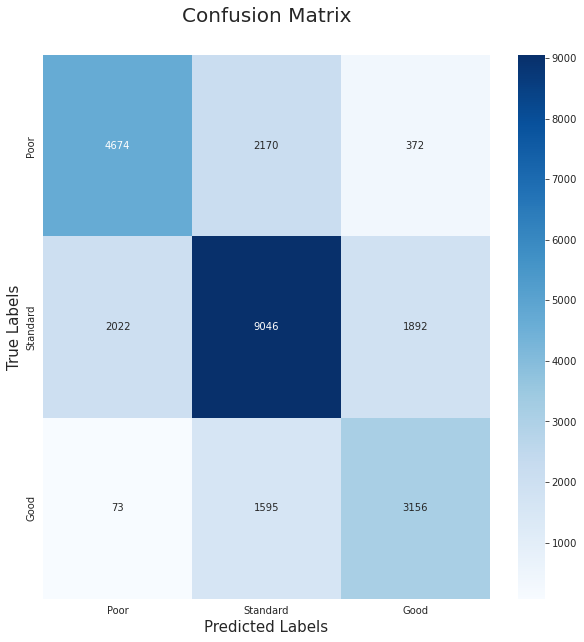

In [72]:
clf_report_plot(y_test, X_test, lgb_clf)

In [74]:
lgb_clf.score(X_test, y_test)

0.67504

# 똥망 성능 어떻게 개선할까? Using Mutual Info Regression

## 다시 스케일링 직전으로 돌아가야함

In [80]:
cleaned_df = df.copy()

In [81]:
raw_cols = cleaned_df.columns.tolist()
raw_cols[:3]

['ID', 'Customer_ID', 'Month']

In [83]:
cleaned_df = cleaned_df.drop(drop_cols, axis=1)

In [84]:
cleaned_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5,25.0,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6,25.0,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7,25.0,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


### Encoding Columns

#### Target Encoding

In [85]:
# label2idx 딕셔너리 생성
label2idx = {'Poor': 0, 'Standard': 1, 'Good': 2}

# cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score'] = cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score']

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [86]:
# idx to label dictionary
idx2label = {}
for idx, value in label2idx.items():
    idx2label[value] = idx

idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

#### Payment Behaviour Encoding

In [87]:
# payment behaviour 변화가 있었는 지 확인 필요
# dictionary 정의

pb2idx = {
    'Low_spent_Small_value_payments':0,
    'Low_spent_Medium_value_payments'  :1,
    'Low_spent_Large_value_payments' :2,
    'High_spent_Small_value_payments' :3,
    'High_spent_Medium_value_payments' :4,
    'High_spent_Large_value_payments'  :5
}

idx2pb = {
    number: string for string, number in pb2idx.items()
}

print(pb2idx)
print(idx2pb)

{'Low_spent_Small_value_payments': 0, 'Low_spent_Medium_value_payments': 1, 'Low_spent_Large_value_payments': 2, 'High_spent_Small_value_payments': 3, 'High_spent_Medium_value_payments': 4, 'High_spent_Large_value_payments': 5}
{0: 'Low_spent_Small_value_payments', 1: 'Low_spent_Medium_value_payments', 2: 'Low_spent_Large_value_payments', 3: 'High_spent_Small_value_payments', 4: 'High_spent_Medium_value_payments', 5: 'High_spent_Large_value_payments'}


In [88]:
cleaned_df['Payment_Behaviour'] = cleaned_df['Payment_Behaviour'].map(pb2idx)

In [89]:
cleaned_df['Payment_Behaviour']

0        3
1        2
2        1
3        0
4        4
        ..
99995    5
99996    4
99997    5
99998    2
99999    4
Name: Payment_Behaviour, Length: 100000, dtype: int64

#### Credit Mix Encoding

In [90]:
credit_mix_dict = {'Good': 2, 'Standard': 1, 'Bad': 0}

mix2label = {number:string for string, number in credit_mix_dict.items()}

In [91]:
cleaned_df['Credit_Mix'] = cleaned_df['Credit_Mix'].map(credit_mix_dict)
cleaned_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,26.822620,265.0,No,49.574949,21.465380,3,312.494089,2
1,3392,2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,2,809.98,31.944960,266.0,No,49.574949,21.465380,2,284.629162,2
2,3392,3,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,28.609352,267.0,No,49.574949,21.465380,1,331.209863,2
3,3392,4,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,2,809.98,31.377862,268.0,No,49.574949,21.465380,0,223.451310,2
4,3392,5,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,2,809.98,24.797347,269.0,No,49.574949,21.465380,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,2,502.38,34.663572,378.0,No,35.104023,24.028477,5,479.866228,0
99996,37932,5,25.0,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,2,502.38,40.565631,379.0,No,35.104023,24.028477,4,496.651610,0
99997,37932,6,25.0,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,2,502.38,41.255522,380.0,No,35.104023,24.028477,5,516.809083,0
99998,37932,7,25.0,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,2,502.38,33.638208,381.0,No,35.104023,24.028477,2,319.164979,1


#### Payment Min Encoding

In [92]:
cleaned_df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le = LabelEncoder()

cleaned_df['Payment_of_Min_Amount'] = le.fit_transform(cleaned_df['Payment_of_Min_Amount'])

pma_classes = le.classes_

In [95]:
print(pma_classes)
print(cleaned_df['Payment_of_Min_Amount'])


['NM' 'No' 'Yes']
0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Payment_of_Min_Amount, Length: 100000, dtype: int64


#### Age Binning

In [96]:
age_range = [10, 20, 30, 40, 50, 60]
age_labels = [10, 20, 30, 40, 50]
age_bins = pd.cut(cleaned_df['Age'], bins=age_range, labels=age_labels)
age_bins.describe()

count     100000
unique         5
top           30
freq       28968
Name: Age, dtype: int64

In [97]:
age_bins

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

In [98]:
cleaned_df['Age'] = age_bins
cleaned_df['Age']

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

In [99]:
cleaned_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,20,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,26.822620,265.0,1,49.574949,21.465380,3,312.494089,2
1,3392,2,20,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,2,809.98,31.944960,266.0,1,49.574949,21.465380,2,284.629162,2
2,3392,3,20,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,2,809.98,28.609352,267.0,1,49.574949,21.465380,1,331.209863,2
3,3392,4,20,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,2,809.98,31.377862,268.0,1,49.574949,21.465380,0,223.451310,2
4,3392,5,20,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,2,809.98,24.797347,269.0,1,49.574949,21.465380,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,20,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,2,502.38,34.663572,378.0,1,35.104023,24.028477,5,479.866228,0
99996,37932,5,20,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,2,502.38,40.565631,379.0,1,35.104023,24.028477,4,496.651610,0
99997,37932,6,20,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,2,502.38,41.255522,380.0,1,35.104023,24.028477,5,516.809083,0
99998,37932,7,20,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,2,502.38,33.638208,381.0,1,35.104023,24.028477,2,319.164979,1


### Dummy 만들기

In [100]:
def dummy_make_do (cols, input_data, thresh=5):
    """
    특정값을 기준으로 Y/N 더미변수로 만들기 위한 함수
    params:
      cols : 전처리 대상 features
      data : 원본 데이터
      thresh : 0/1 으로 만들기 위한 기준
    """

    data = input_data.copy()

    for col in cols:
        data[col] = data.apply(get_dummy,axis=1,args=[col,thresh])

    return data

def get_dummy(data, col ,thresh=5):

    if data[col] >= thresh :
        return 1
    elif data[col] < thresh:
        return 0
    else:
        return 2

In [101]:
# 더미 생성

print('전')
print(cleaned_df[dummy_cols].head())

cleaned_df = dummy_make_do(['Num_of_Loan'], cleaned_df, 5)
cleaned_df = dummy_make_do(['Changed_Credit_Limit'], cleaned_df, 12)
cleaned_df = dummy_make_do(['Credit_History_Age'], cleaned_df, 180)

print('\n후')
print(cleaned_df[dummy_cols].head())

전
   Num_of_Loan  Changed_Credit_Limit  Credit_History_Age
0          4.0                 11.27               265.0
1          4.0                 11.27               266.0
2          4.0                 11.27               267.0
3          4.0                  6.27               268.0
4          4.0                 11.27               269.0

후
   Num_of_Loan  Changed_Credit_Limit  Credit_History_Age
0            0                     0                   1
1            0                     0                   1
2            0                     0                   1
3            0                     0                   1
4            0                     0                   1


### Transformation

In [102]:
cleaned_df['Monthly_Inhand_Salary'] = np.log(cleaned_df['Monthly_Inhand_Salary'])
cleaned_df['Amount_invested_monthly'] = np.sqrt(cleaned_df['Amount_invested_monthly'])
cleaned_df['Outstanding_Debt'] = np.sqrt(cleaned_df['Outstanding_Debt'])
cleaned_df['Delay_from_due_date'] = np.sqrt(cleaned_df['Delay_from_due_date'])

In [103]:
cleaned_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,26.822620,1,1,49.574949,4.633075,3,312.494089,2
1,3392,2,20,7.509249,3.0,4.0,3.0,0,1.732051,4.0,...,2,28.460148,31.944960,1,1,49.574949,4.633075,2,284.629162,2
2,3392,3,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,28.609352,1,1,49.574949,4.633075,1,331.209863,2
3,3392,4,20,7.509249,3.0,4.0,3.0,0,2.236068,4.0,...,2,28.460148,31.377862,1,1,49.574949,4.633075,0,223.451310,2
4,3392,5,20,7.509249,3.0,4.0,3.0,0,2.449490,4.0,...,2,28.460148,24.797347,1,1,49.574949,4.633075,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,20,8.119522,4.0,6.0,7.0,0,4.795832,7.0,...,2,22.413835,34.663572,1,1,35.104023,4.901885,5,479.866228,0
99996,37932,5,20,8.119522,4.0,6.0,7.0,0,4.242641,7.0,...,2,22.413835,40.565631,1,1,35.104023,4.901885,4,496.651610,0
99997,37932,6,20,8.119522,4.0,6.0,7.0,0,5.196152,6.0,...,2,22.413835,41.255522,1,1,35.104023,4.901885,5,516.809083,0
99998,37932,7,20,8.119522,4.0,6.0,7.0,0,4.472136,6.0,...,2,22.413835,33.638208,1,1,35.104023,4.901885,2,319.164979,1


## Mutual Info Regression

In [107]:
train_df = cleaned_df.loc[cleaned_df['Month'] <= 6, :]
test_df = cleaned_df.loc[cleaned_df['Month'] > 6, :]

print(train_df.shape)
print(test_df.shape)

(75000, 22)
(25000, 22)


In [104]:
from sklearn.feature_selection import mutual_info_regression

In [105]:
def make_mi_scores(X, y, discrete_features):

    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores

In [108]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,26.822620,1,1,49.574949,4.633075,3,312.494089,2
1,3392,2,20,7.509249,3.0,4.0,3.0,0,1.732051,4.0,...,2,28.460148,31.944960,1,1,49.574949,4.633075,2,284.629162,2
2,3392,3,20,7.509249,3.0,4.0,3.0,0,1.732051,7.0,...,2,28.460148,28.609352,1,1,49.574949,4.633075,1,331.209863,2
3,3392,4,20,7.509249,3.0,4.0,3.0,0,2.236068,4.0,...,2,28.460148,31.377862,1,1,49.574949,4.633075,0,223.451310,2
4,3392,5,20,7.509249,3.0,4.0,3.0,0,2.449490,4.0,...,2,28.460148,24.797347,1,1,49.574949,4.633075,4,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,37932,2,20,8.119522,4.0,6.0,7.0,0,4.795832,6.0,...,2,22.413835,29.135447,1,1,35.104023,4.901885,1,400.104466,1
99994,37932,3,20,8.119522,4.0,6.0,7.0,0,4.472136,6.0,...,2,22.413835,39.323569,1,1,35.104023,4.901885,4,410.256158,0
99995,37932,4,20,8.119522,4.0,6.0,7.0,0,4.795832,7.0,...,2,22.413835,34.663572,1,1,35.104023,4.901885,5,479.866228,0
99996,37932,5,20,8.119522,4.0,6.0,7.0,0,4.242641,7.0,...,2,22.413835,40.565631,1,1,35.104023,4.901885,4,496.651610,0


In [115]:
# discrete_features = train_df.dtypes == int
# print(discrete_features)

In [116]:
X, y = train_df.iloc[:, :-1], train_df.iloc[:, -1]

In [117]:
mutual_info_scores = make_mi_scores(X, y, discrete_features='auto')

In [120]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Customer_ID                 0.642196
Amount_invested_monthly     0.631673
Monthly_Inhand_Salary       0.628268
Outstanding_Debt            0.622664
Total_EMI_per_month         0.573233
Credit_Mix                  0.215824
Interest_Rate               0.188575
Num_Credit_Inquiries        0.138062
Delay_from_due_date         0.134614
Payment_of_Min_Amount       0.119180
Num_Credit_Card             0.118184
Num_Bank_Accounts           0.116040
Num_of_Delayed_Payment      0.099298
Credit_History_Age          0.089707
Num_of_Loan                 0.084756
Changed_Credit_Limit        0.038391
Monthly_Balance             0.036693
Age                         0.012546
Payment_Behaviour           0.005772
Credit_Utilization_Ratio    0.000076
Month                       0.000000
Name: MI Scores, dtype: float64


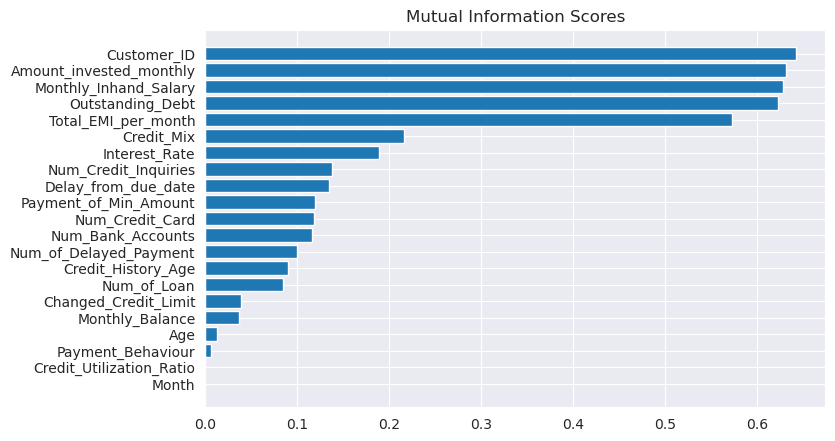

In [121]:
print(mutual_info_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mutual_info_scores)